In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
ds = np.load('dataset/3_2_0_256.npz', allow_pickle=True)
db_train, db_test = ds['pahdb']
fp_train, fp_test = ds['fingerprint']
spec_train, spec_test = ds['spectrum']

In [3]:
def emd_loss(y_true, y_pred):
#     y_true = y_true / tf.reduce_sum(y_true, axis=-1)[:, None]
#     y_pred = y_pred / tf.reduce_sum(y_pred, axis=-1)[:, None]
    loss = tf.math.abs(tf.math.cumsum(y_true - y_pred, axis=-1))
    return tf.reduce_sum(loss, axis=-1)

In [4]:
%%time

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(fp_train.shape[1],), sparse=True),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(spec_train.shape[1]),
    tf.keras.layers.Lambda(lambda x: tf.math.abs(x)),
    tf.keras.layers.Lambda(lambda x: x / tf.reduce_sum(x, axis=-1)[:, None])
])

model.compile(loss=emd_loss, optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=[])
model.fit(fp_train, spec_train.values, batch_size=32, epochs=1000, validation_data=(fp_test, spec_test.values), verbose=2, callbacks=[
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=10, verbose=1, min_delta=1e-4, min_lr=1e-6),
    tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=20)])

Epoch 1/1000


D:\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 2048), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


74/74 - 2s - loss: 10.0033 - val_loss: 6.4605
Epoch 2/1000
74/74 - 0s - loss: 5.9387 - val_loss: 5.8294
Epoch 3/1000
74/74 - 0s - loss: 5.4449 - val_loss: 5.4229
Epoch 4/1000
74/74 - 0s - loss: 4.8587 - val_loss: 4.8597
Epoch 5/1000
74/74 - 0s - loss: 4.3494 - val_loss: 4.5695
Epoch 6/1000
74/74 - 0s - loss: 4.1805 - val_loss: 4.5562
Epoch 7/1000
74/74 - 0s - loss: 4.0119 - val_loss: 4.3773
Epoch 8/1000
74/74 - 0s - loss: 3.7985 - val_loss: 4.4055
Epoch 9/1000
74/74 - 0s - loss: 3.7330 - val_loss: 4.3260
Epoch 10/1000
74/74 - 0s - loss: 3.6799 - val_loss: 4.3139
Epoch 11/1000
74/74 - 0s - loss: 3.5972 - val_loss: 4.2618
Epoch 12/1000
74/74 - 0s - loss: 3.4690 - val_loss: 4.2448
Epoch 13/1000
74/74 - 0s - loss: 3.4560 - val_loss: 4.3418
Epoch 14/1000
74/74 - 0s - loss: 3.2802 - val_loss: 4.2629
Epoch 15/1000
74/74 - 0s - loss: 3.1817 - val_loss: 4.0900
Epoch 16/1000
74/74 - 0s - loss: 3.1125 - val_loss: 4.1639
Epoch 17/1000
74/74 - 0s - loss: 3.0850 - val_loss: 4.1410
Epoch 18/1000
74/7

Epoch 140/1000
74/74 - 0s - loss: 1.6409 - val_loss: 3.5667
Epoch 141/1000
74/74 - 0s - loss: 1.6421 - val_loss: 3.5469
Epoch 142/1000
74/74 - 0s - loss: 1.6890 - val_loss: 3.5439
Epoch 143/1000
74/74 - 0s - loss: 1.6655 - val_loss: 3.7127
Epoch 144/1000
74/74 - 0s - loss: 1.6824 - val_loss: 3.4674
Epoch 145/1000
74/74 - 0s - loss: 1.6314 - val_loss: 3.4978
Epoch 146/1000
74/74 - 0s - loss: 1.6038 - val_loss: 3.4587
Epoch 147/1000
74/74 - 0s - loss: 1.6530 - val_loss: 3.4859
Epoch 148/1000
74/74 - 0s - loss: 1.6031 - val_loss: 3.5391
Epoch 149/1000
74/74 - 0s - loss: 1.6711 - val_loss: 3.4708
Epoch 150/1000
74/74 - 0s - loss: 1.5885 - val_loss: 3.5144
Epoch 151/1000
74/74 - 0s - loss: 1.5860 - val_loss: 3.5137
Epoch 152/1000
74/74 - 0s - loss: 1.6175 - val_loss: 3.5158
Epoch 153/1000
74/74 - 0s - loss: 1.5897 - val_loss: 3.4471
Epoch 154/1000
74/74 - 0s - loss: 1.5835 - val_loss: 3.4919
Epoch 155/1000
74/74 - 0s - loss: 1.5999 - val_loss: 3.4257
Epoch 156/1000
74/74 - 0s - loss: 1.6218

Epoch 274/1000
74/74 - 0s - loss: 1.2196 - val_loss: 3.3205
Epoch 275/1000
74/74 - 0s - loss: 1.2239 - val_loss: 3.3195
Epoch 276/1000
74/74 - 0s - loss: 1.2202 - val_loss: 3.3423
Epoch 277/1000
74/74 - 0s - loss: 1.2250 - val_loss: 3.3285
Epoch 278/1000
74/74 - 0s - loss: 1.2317 - val_loss: 3.3186
Epoch 279/1000
74/74 - 0s - loss: 1.2199 - val_loss: 3.3143
Epoch 280/1000
74/74 - 0s - loss: 1.2187 - val_loss: 3.3134
Epoch 281/1000
74/74 - 0s - loss: 1.2134 - val_loss: 3.3182
Epoch 282/1000
74/74 - 0s - loss: 1.2137 - val_loss: 3.3288
Epoch 283/1000
74/74 - 0s - loss: 1.2188 - val_loss: 3.3179
Epoch 284/1000
74/74 - 0s - loss: 1.2146 - val_loss: 3.3200
Epoch 285/1000
74/74 - 0s - loss: 1.2265 - val_loss: 3.3335
Epoch 286/1000
74/74 - 0s - loss: 1.2202 - val_loss: 3.3021
Epoch 287/1000
74/74 - 0s - loss: 1.2166 - val_loss: 3.3175
Epoch 288/1000
74/74 - 0s - loss: 1.2256 - val_loss: 3.3153
Epoch 289/1000
74/74 - 0s - loss: 1.2191 - val_loss: 3.3351
Epoch 290/1000
74/74 - 0s - loss: 1.2262

Epoch 408/1000
74/74 - 0s - loss: 1.1275 - val_loss: 3.3003
Epoch 409/1000
74/74 - 0s - loss: 1.1292 - val_loss: 3.2997
Epoch 410/1000
74/74 - 0s - loss: 1.1286 - val_loss: 3.3055
Epoch 411/1000
74/74 - 0s - loss: 1.1278 - val_loss: 3.3002
Epoch 412/1000
74/74 - 0s - loss: 1.1292 - val_loss: 3.3024
Epoch 413/1000
74/74 - 0s - loss: 1.1269 - val_loss: 3.3007
Epoch 414/1000
74/74 - 0s - loss: 1.1276 - val_loss: 3.2991
Epoch 415/1000
74/74 - 0s - loss: 1.1271 - val_loss: 3.3009
Epoch 416/1000
74/74 - 0s - loss: 1.1274 - val_loss: 3.3014
Epoch 417/1000
74/74 - 0s - loss: 1.1293 - val_loss: 3.3043
Epoch 418/1000
74/74 - 0s - loss: 1.1276 - val_loss: 3.3025
Epoch 419/1000
74/74 - 0s - loss: 1.1251 - val_loss: 3.3028
Epoch 420/1000
74/74 - 0s - loss: 1.1259 - val_loss: 3.3035
Epoch 421/1000
74/74 - 0s - loss: 1.1282 - val_loss: 3.3096
Epoch 422/1000
74/74 - 0s - loss: 1.1273 - val_loss: 3.3068
Epoch 423/1000
74/74 - 0s - loss: 1.1237 - val_loss: 3.3012
Epoch 424/1000
74/74 - 0s - loss: 1.1249

74/74 - 0s - loss: 1.1025 - val_loss: 3.3076
Epoch 544/1000
74/74 - 0s - loss: 1.1012 - val_loss: 3.3103
Epoch 545/1000
74/74 - 0s - loss: 1.1012 - val_loss: 3.3069
Epoch 546/1000
74/74 - 0s - loss: 1.1015 - val_loss: 3.3043
Epoch 547/1000
74/74 - 0s - loss: 1.1015 - val_loss: 3.3097
Epoch 548/1000
74/74 - 0s - loss: 1.1013 - val_loss: 3.3100
Epoch 549/1000
74/74 - 0s - loss: 1.1007 - val_loss: 3.3076
Epoch 550/1000
74/74 - 0s - loss: 1.1008 - val_loss: 3.3074
Epoch 551/1000
74/74 - 0s - loss: 1.1013 - val_loss: 3.3064
Epoch 552/1000
74/74 - 0s - loss: 1.1012 - val_loss: 3.3069
Epoch 553/1000
74/74 - 0s - loss: 1.1014 - val_loss: 3.3049
Epoch 554/1000
74/74 - 0s - loss: 1.1001 - val_loss: 3.3085
Epoch 555/1000
74/74 - 0s - loss: 1.0999 - val_loss: 3.3090
Epoch 556/1000
74/74 - 0s - loss: 1.1007 - val_loss: 3.3074
Epoch 557/1000
74/74 - 0s - loss: 1.1005 - val_loss: 3.3073
Epoch 558/1000
74/74 - 0s - loss: 1.1007 - val_loss: 3.3078
Epoch 559/1000
74/74 - 0s - loss: 1.1001 - val_loss: 3.

Epoch 680/1000
74/74 - 0s - loss: 1.0911 - val_loss: 3.3105
Epoch 681/1000
74/74 - 0s - loss: 1.0905 - val_loss: 3.3114
Epoch 682/1000
74/74 - 0s - loss: 1.0896 - val_loss: 3.3127
Epoch 683/1000
74/74 - 0s - loss: 1.0895 - val_loss: 3.3105
Epoch 684/1000
74/74 - 0s - loss: 1.0889 - val_loss: 3.3129
Epoch 685/1000
74/74 - 0s - loss: 1.0893 - val_loss: 3.3127
Epoch 686/1000
74/74 - 0s - loss: 1.0890 - val_loss: 3.3110
Epoch 687/1000
74/74 - 0s - loss: 1.0891 - val_loss: 3.3092
Epoch 688/1000
74/74 - 0s - loss: 1.0887 - val_loss: 3.3128
Epoch 689/1000
74/74 - 0s - loss: 1.0898 - val_loss: 3.3127
Epoch 690/1000
74/74 - 0s - loss: 1.0894 - val_loss: 3.3119
Epoch 691/1000
74/74 - 0s - loss: 1.0903 - val_loss: 3.3106
Epoch 692/1000
74/74 - 0s - loss: 1.0886 - val_loss: 3.3130
Epoch 693/1000
74/74 - 0s - loss: 1.0892 - val_loss: 3.3112
Epoch 694/1000
74/74 - 0s - loss: 1.0892 - val_loss: 3.3096
Epoch 695/1000
74/74 - 0s - loss: 1.0888 - val_loss: 3.3137
Epoch 696/1000
74/74 - 0s - loss: 1.0896

Epoch 814/1000
74/74 - 0s - loss: 1.0784 - val_loss: 3.3109
Epoch 815/1000
74/74 - 0s - loss: 1.0782 - val_loss: 3.3117
Epoch 816/1000
74/74 - 0s - loss: 1.0782 - val_loss: 3.3119
Epoch 817/1000
74/74 - 0s - loss: 1.0782 - val_loss: 3.3113
Epoch 818/1000
74/74 - 0s - loss: 1.0782 - val_loss: 3.3113
Epoch 819/1000
74/74 - 0s - loss: 1.0781 - val_loss: 3.3119
Epoch 820/1000
74/74 - 0s - loss: 1.0781 - val_loss: 3.3111
Epoch 821/1000
74/74 - 0s - loss: 1.0782 - val_loss: 3.3113
Epoch 822/1000
74/74 - 0s - loss: 1.0780 - val_loss: 3.3111
Epoch 823/1000
74/74 - 0s - loss: 1.0780 - val_loss: 3.3114
Epoch 824/1000
74/74 - 0s - loss: 1.0781 - val_loss: 3.3121
Epoch 825/1000
74/74 - 0s - loss: 1.0779 - val_loss: 3.3111
Epoch 826/1000
74/74 - 0s - loss: 1.0781 - val_loss: 3.3123
Epoch 827/1000
74/74 - 0s - loss: 1.0779 - val_loss: 3.3115
Epoch 828/1000
74/74 - 0s - loss: 1.0782 - val_loss: 3.3109
Epoch 829/1000
74/74 - 0s - loss: 1.0780 - val_loss: 3.3116
Epoch 830/1000
74/74 - 0s - loss: 1.0779

0.8243942045961454

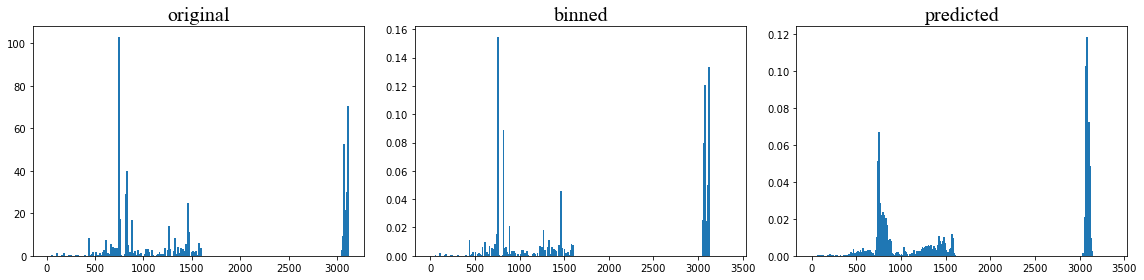

In [5]:
i = 4

fig, axes = plt.subplots(1, 3, figsize=(16, 4), tight_layout=True)
axes[0].bar(db_test[i]['spectrum'][:, 0], db_test[i]['spectrum'][:, 1], width=20)
axes[0].set_title('original', {'family': 'Times New Roman', 'size': 20})
axes[1].bar([i.mid for i in spec_train.columns], spec_test.loc[i], width=20)
axes[1].set_title('binned', {'family': 'Times New Roman', 'size': 20})
axes[2].bar([i.mid for i in spec_train.columns], model.predict(tf.sparse.slice(fp_test, [i, 0], [1, fp_test.shape[1]]))[0], width=20)
axes[2].set_title('predicted', {'family': 'Times New Roman', 'size': 20})

emd_loss(spec_test.loc[i], model.predict(tf.sparse.slice(fp_test, [i, 0], [1, fp_test.shape[1]]))[0]).numpy()